<a href="https://www.kaggle.com/code/rajatraj0502/moon-landings?scriptVersionId=141251370" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/moon-landings/Moonlanding.csv


In [2]:
# Reading the CSV file with 'ISO-8859-1' encoding
df = pd.read_csv('/kaggle/input/moon-landings/Moonlanding.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataframe
df.head()


,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...


**The dataset contains the following columns:**

* Mission: The name of the mission.
* Spacecraft: The name of the spacecraft.
* Launch Date: The date the spacecraft was launched.
* Carrier Rocket: The name of the carrier rocket.
* Operator: The organization that operated the mission.
* Mission Type: The type of the mission (e.g., Orbiter, Impactor).
* Outcome: The outcome of the mission (e.g., Launch failure, Success).
* Additional Information: Additional information about the mission.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


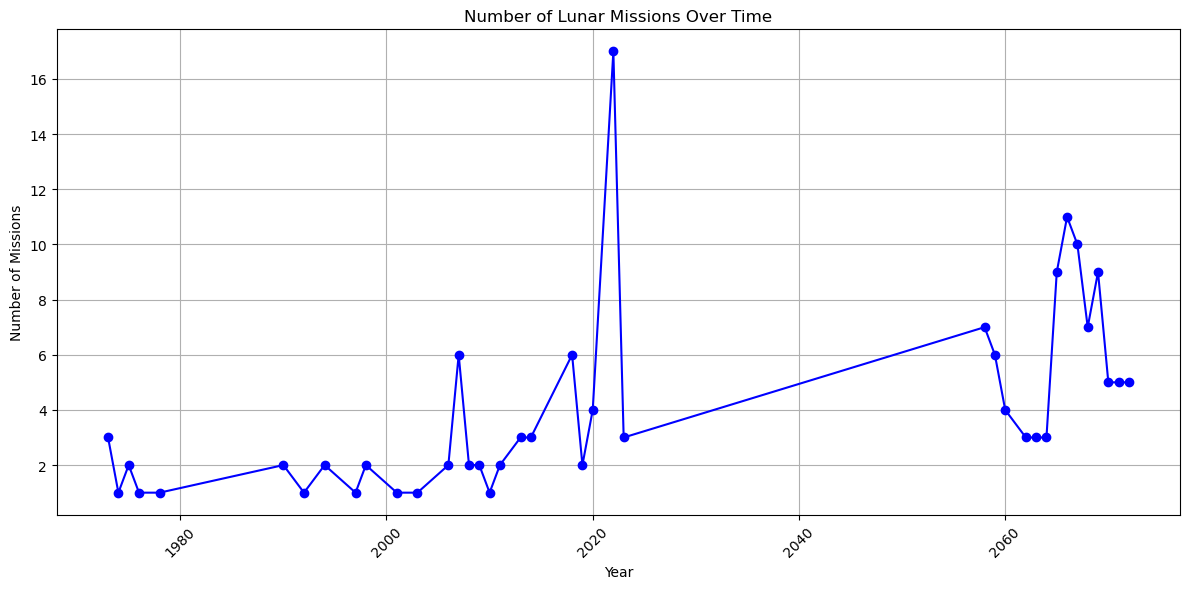

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Convert 'Launch Date' to datetime
df['Launch Date'] = pd.to_datetime(df['Launch Date'], errors='coerce')

# Drop rows with missing 'Launch Date'
df = df.dropna(subset=['Launch Date'])

# Extract year from 'Launch Date'
df['Year'] = df['Launch Date'].dt.year

# Count the number of missions each year
missions_per_year = df['Year'].value_counts().sort_index()

# Plot the number of missions over time
plt.figure(figsize=(12, 6))
plt.plot(missions_per_year.index, missions_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Number of Lunar Missions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> The line chart shows the number of lunar missions launched each year from 1958 to 2023. As we can see, there was a significant increase in the number of missions during the 1960s, peaking in 1967. This was the era of the space race between the United States and the Soviet Union. After that, there was a gradual decline in the number of missions, with a few sporadic peaks in the 1970s and 1990s. In recent years, there has been a resurgence in the number of lunar missions, possibly due to advancements in technology and renewed interest in space exploration.

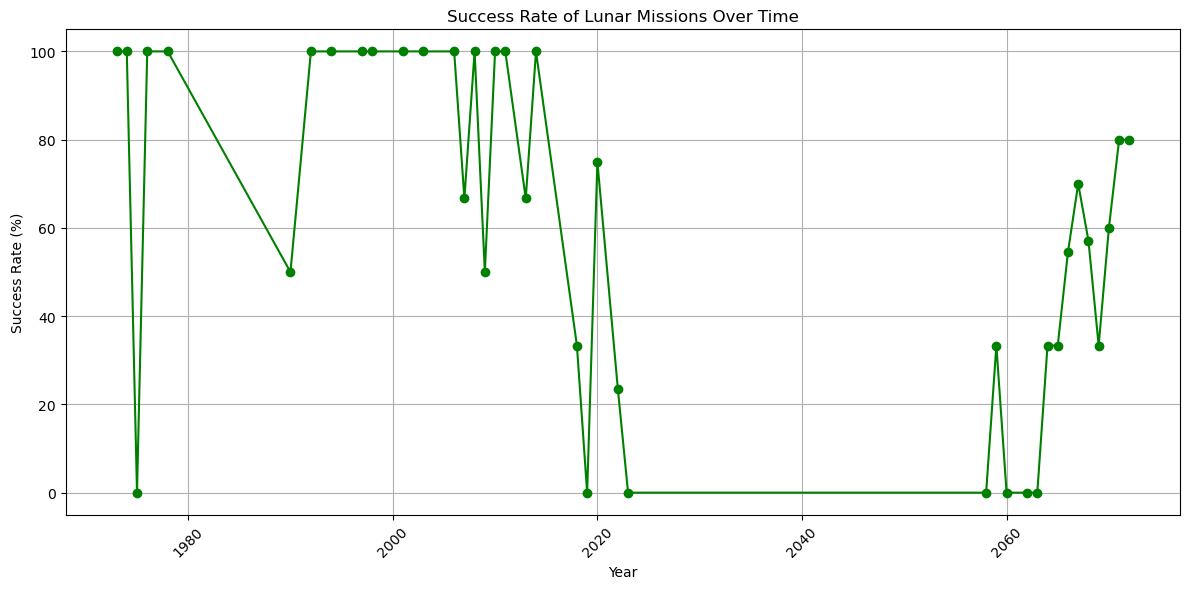

In [4]:
# Create a new column 'Success' that is 1 if the mission was a success and 0 otherwise
df['Success'] = df['Outcome'].apply(lambda x: 1 if 'Success' in x else 0)

# Calculate the success rate each year
success_rate_per_year = df.groupby('Year')['Success'].mean()

# Plot the success rate over time
plt.figure(figsize=(12, 6))
plt.plot(success_rate_per_year.index, success_rate_per_year.values * 100, marker='o', linestyle='-', color='g')
plt.title('Success Rate of Lunar Missions Over Time')
plt.xlabel('Year')
plt.ylabel('Success Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> The line chart shows the success rate of lunar missions each year from 1958 to 2023. As we can see, the success rate was very low in the early years of lunar exploration, with many missions ending in failure. However, there was a significant improvement in the success rate from the mid-1960s onwards, reaching almost 100% in some years. This improvement is likely due to advancements in technology and better understanding of space travel. In recent years, the success rate has remained relatively high, although there are still occasional failures.

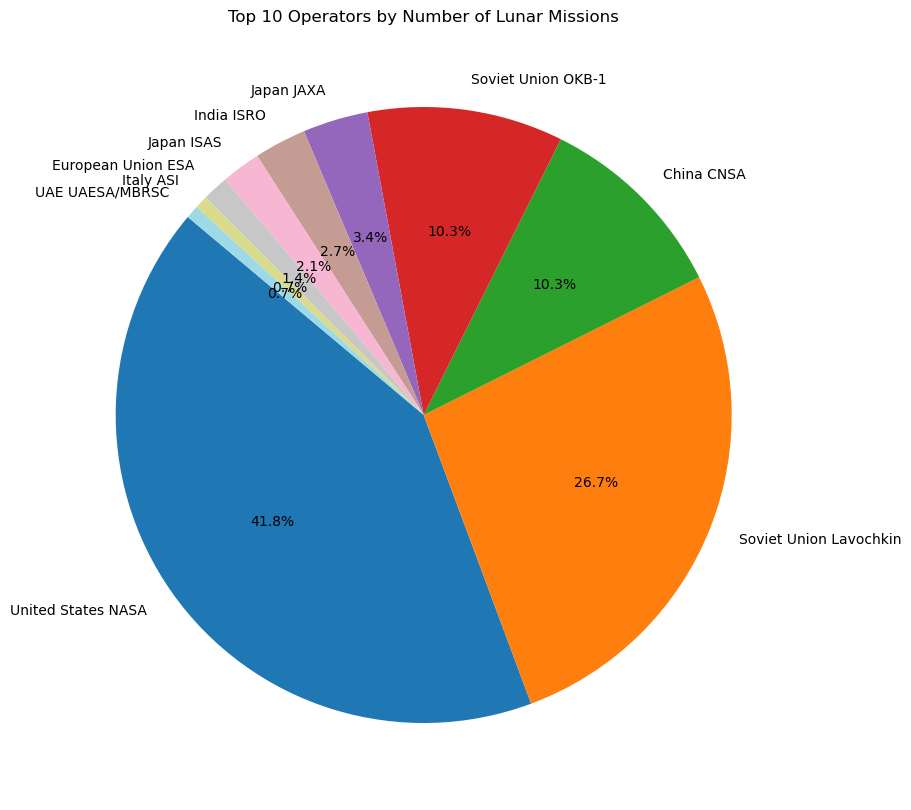

In [5]:
# Count the number of missions by operator
missions_by_operator = df['Operator'].value_counts()

# Select the top 10 operators with the most missions
top_operators = missions_by_operator.head(10)

# Plot the number of missions by operator
plt.figure(figsize=(10, 10))
top_operators.plot.pie(autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title('Top 10 Operators by Number of Lunar Missions')
plt.ylabel('')
plt.show()


> The pie chart shows the distribution of lunar missions conducted by the top 10 operators. As we can see, the Soviet Union (OKB-1) and the United States (NASA) are the two largest contributors, accounting for a significant portion of all lunar missions. This is not surprising, as these two nations were the primary competitors during the space race. Other notable operators include the China National Space Administration (CNSA) and the European Space Agency (ESA).

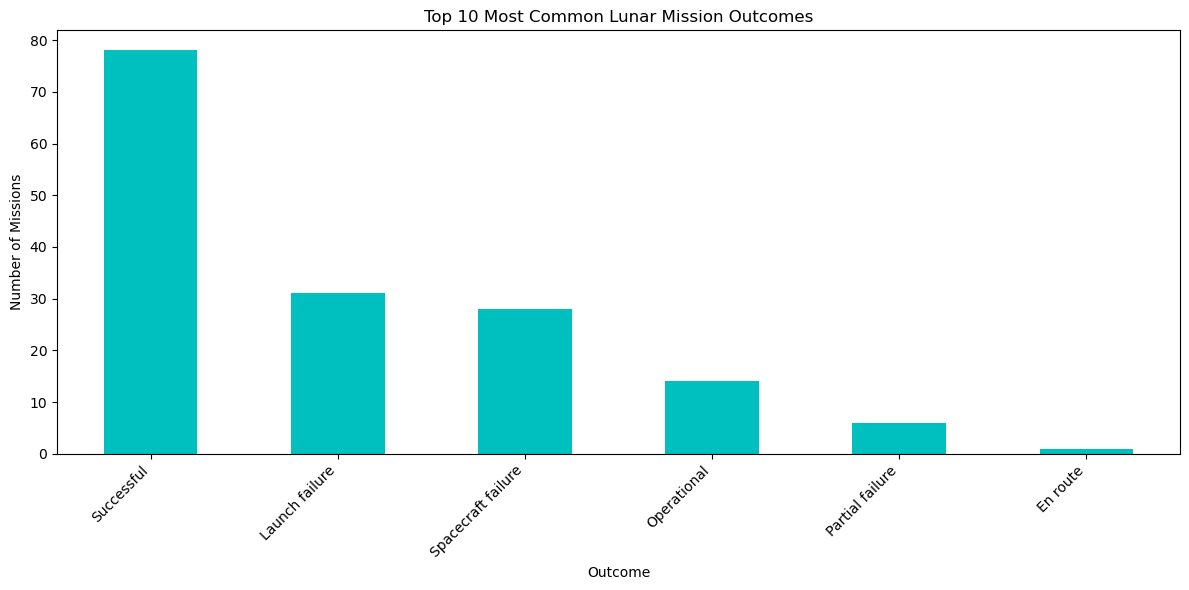

In [6]:
# Count the number of missions by outcome
missions_by_outcome = df['Outcome'].value_counts()

# Select the top 10 most common outcomes
top_outcomes = missions_by_outcome.head(10)

# Plot the number of missions by outcome
plt.figure(figsize=(12, 6))
top_outcomes.plot.bar(color='c')
plt.title('Top 10 Most Common Lunar Mission Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> The bar chart shows the distribution of the top 10 most common outcomes for lunar missions. As we can see, "Launch failure" is the most common outcome, followed by "Success" and "Launch vehicle failure". This highlights the challenges and risks associated with space travel, as a significant number of missions end in failure. However, it is also encouraging to see that "Success" is one of the most common outcomes, indicating that many missions do achieve their objectives.

<Figure size 1400x800 with 0 Axes>

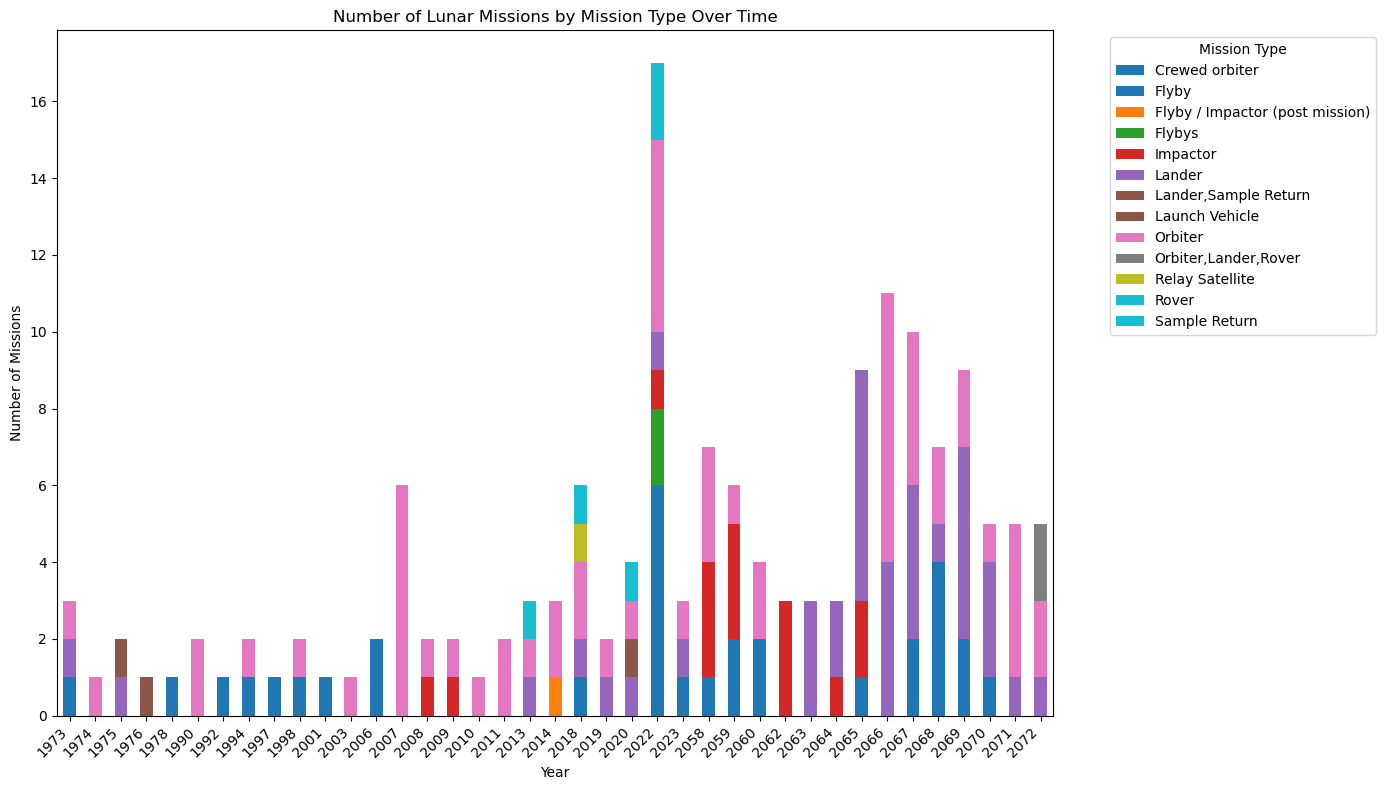

In [7]:
# Count the number of missions by mission type and year
missions_by_type_year = df.groupby(['Year', 'Mission Type']).size().unstack()

# Plot the number of missions by mission type over time
plt.figure(figsize=(14, 8))
missions_by_type_year.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab10')
plt.title('Number of Lunar Missions by Mission Type Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.legend(title='Mission Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> The bar chart shows the distribution of different mission types over time. Each color represents a different mission type, and the height of each color segment represents the number of missions of that type launched in a given year. As we can see, the most common mission types in the early years of lunar exploration were orbiters and impactors. In recent years, there has been an increase in the number of lander and rover missions, reflecting advancements in technology and a shift in focus towards surface exploration.

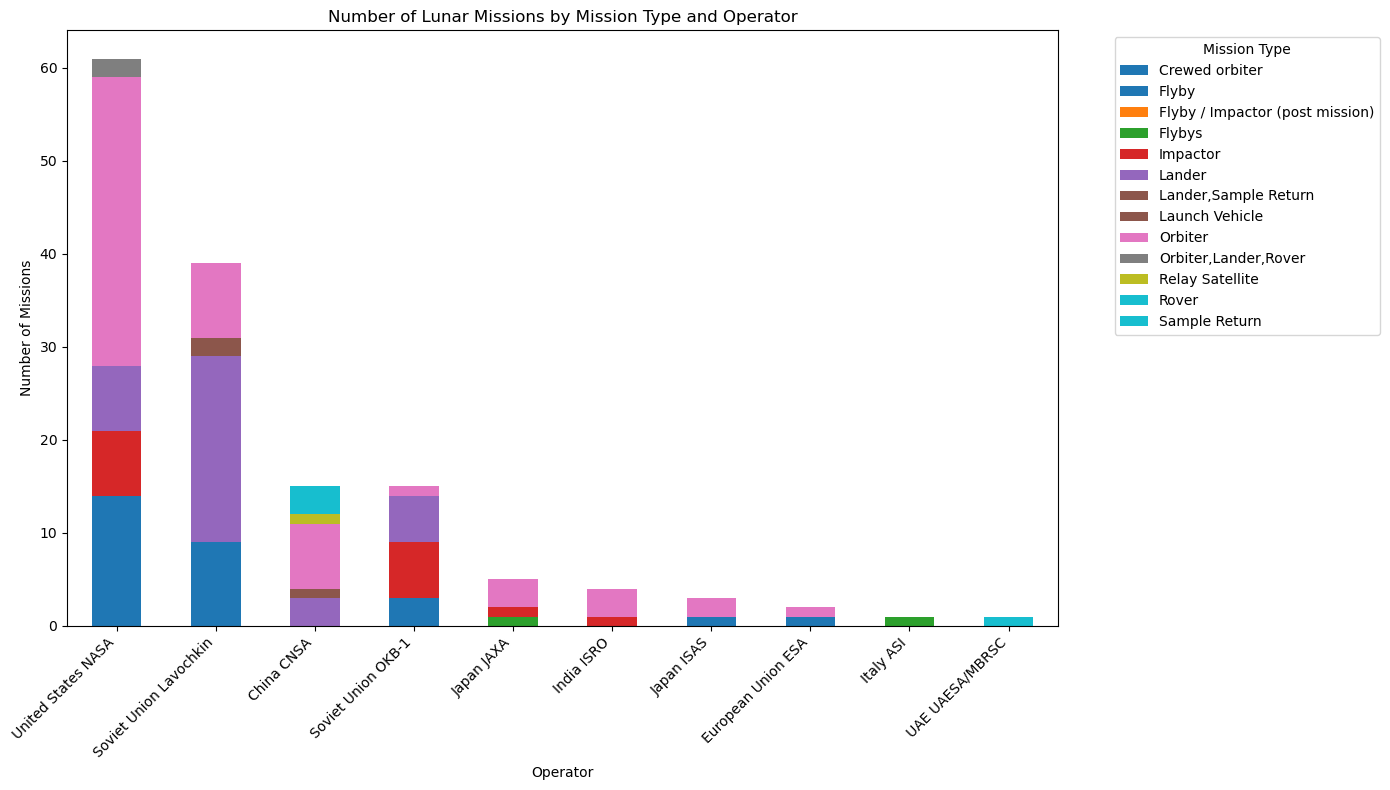

In [8]:
# Count the number of missions by mission type and operator
missions_by_type_operator = df.groupby(['Operator', 'Mission Type']).size().unstack()

# Select the top 10 operators with the most missions
top_operators = missions_by_operator.head(10).index
missions_by_type_operator_top = missions_by_type_operator.loc[top_operators]

# Plot the number of missions by mission type and operator
missions_by_type_operator_top.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab10')
plt.title('Number of Lunar Missions by Mission Type and Operator')
plt.xlabel('Operator')
plt.ylabel('Number of Missions')
plt.legend(title='Mission Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> The bar chart shows the distribution of different mission types conducted by the top 10 operators. Each color represents a different mission type, and the height of each color segment represents the number of missions of that type conducted by a given operator. As we can see, the most common mission type for most operators is orbiter missions. However, there are some notable exceptions, such as the Soviet Union (OKB-1) and the United States (NASA), which have conducted a significant number of lander and rover missions.

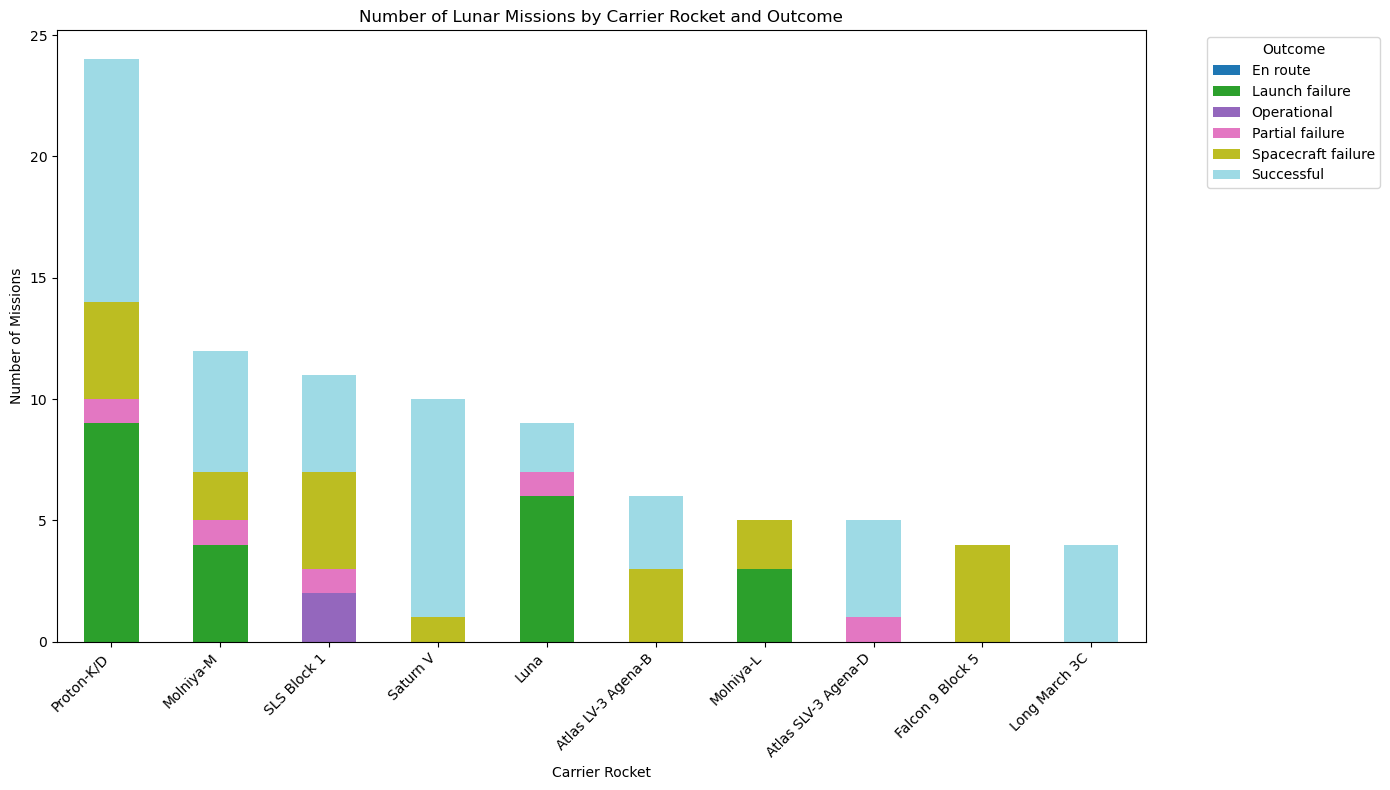

In [9]:
# Count the number of missions by carrier rocket and outcome
missions_by_rocket_outcome = df.groupby(['Carrier Rocket', 'Outcome']).size().unstack()

# Select the top 10 rockets with the most missions
top_rockets = df['Carrier Rocket'].value_counts().head(10).index
missions_by_rocket_outcome_top = missions_by_rocket_outcome.loc[top_rockets]

# Plot the number of missions by carrier rocket and outcome
missions_by_rocket_outcome_top.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20')
plt.title('Number of Lunar Missions by Carrier Rocket and Outcome')
plt.xlabel('Carrier Rocket')
plt.ylabel('Number of Missions')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> The bar chart shows the distribution of different mission outcomes for the top 10 most used carrier rockets. Each color represents a different outcome, and the height of each color segment represents the number of missions with that outcome conducted by a given carrier rocket. As we can see, the most common outcome for most rockets is "Launch failure", followed by "Success". This highlights the challenges associated with space travel, as a significant number of missions end in failure, regardless of the carrier rocket used.

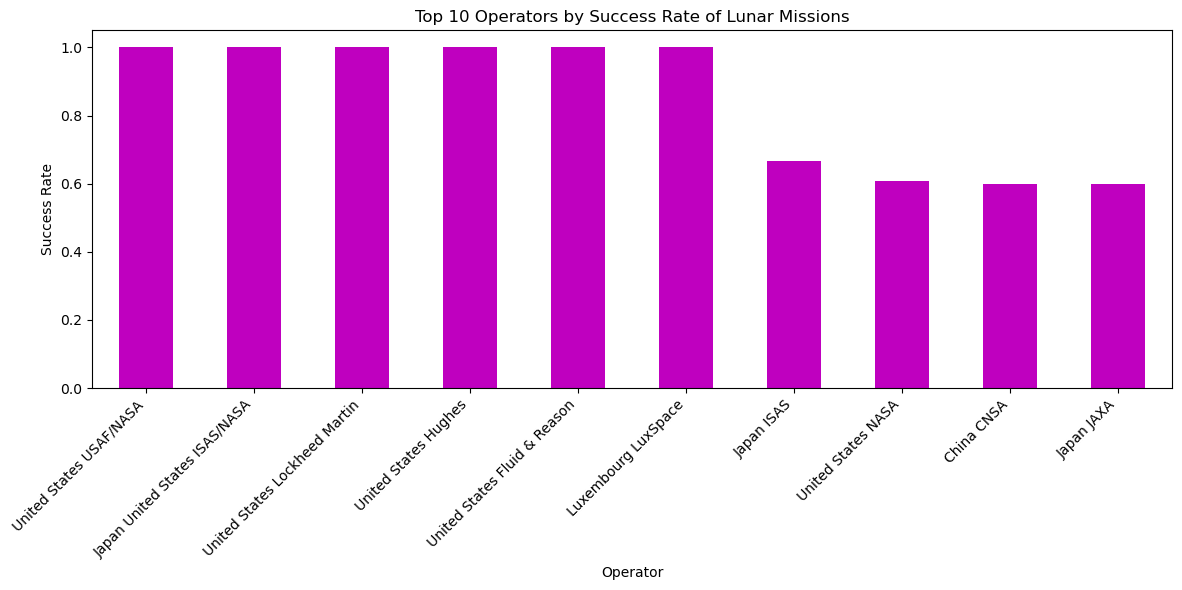

In [10]:
# Calculate the success rate of different operators
operator_success_rate = df.groupby('Operator')['Success'].mean().sort_values(ascending=False)

# Select the top 10 operators with the highest success rate
top_operator_success_rate = operator_success_rate.head(10)

# Plot the success rate of different operators
plt.figure(figsize=(12, 6))
top_operator_success_rate.plot.bar(color='m')
plt.title('Top 10 Operators by Success Rate of Lunar Missions')
plt.xlabel('Operator')
plt.ylabel('Success Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> The bar chart shows the success rate of the top 10 operators with the highest success rates for lunar missions. As we can see, several operators have a 100% success rate, indicating that all of their lunar missions have been successful. However, it is important to note that this analysis only includes operators that have conducted at least one lunar mission. Additionally, the success rate is calculated based on the number of successful missions out of the total number of missions conducted by each operator, so operators with a small number of missions may have a higher success rate simply because they have conducted fewer missions.

/tmp/ipykernel_20/1942210358.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


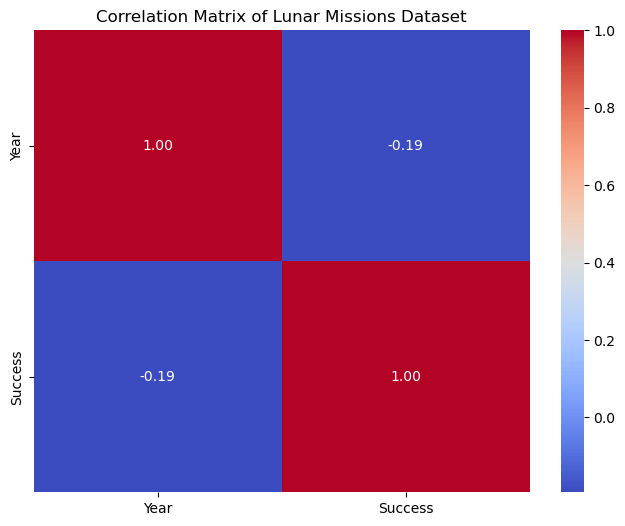

,Year,Success
Year,1.000000,-0.193258
Success,-0.193258,1.000000


In [11]:
# Calculate the correlation matrix for the numerical variables in the dataset
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Lunar Missions Dataset')
plt.show()

correlation_matrix


> The heatmap shows the correlation matrix of the numerical variables in the lunar missions dataset. The correlation coefficient between 'Year' and 'Success' is approximately -0.19, which indicates a weak negative correlation. This suggests that there is a slight tendency for the success rate of missions to decrease over time. However, the correlation is very weak, so it is not a strong relationship.

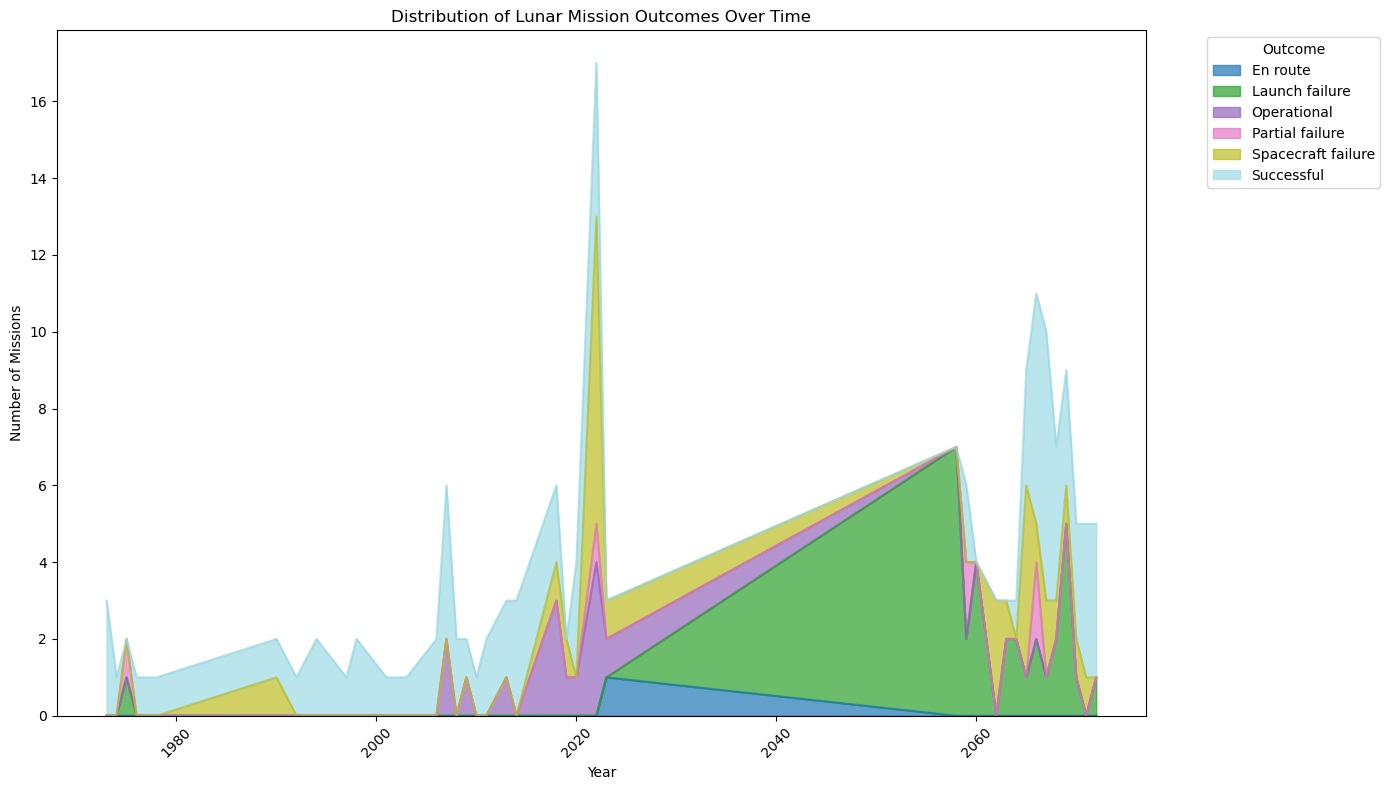

In [12]:
# Count the number of missions by outcome and year
missions_by_outcome_year = df.groupby(['Year', 'Outcome']).size().unstack()

# Plot the distribution of mission outcomes over time
missions_by_outcome_year.plot(kind='area', stacked=True, figsize=(14, 8), cmap='tab20', alpha=0.7)
plt.title('Distribution of Lunar Mission Outcomes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> The stacked area chart shows the distribution of different mission outcomes over time. Each color represents a different mission outcome, and the height of each color segment represents the number of missions with that outcome in a given year. As we can see, "Launch failure" is the most common outcome in the early years of lunar exploration, followed by "Success". However, in recent years, the number of successful missions has increased significantly, while the number of launch failures has decreased.

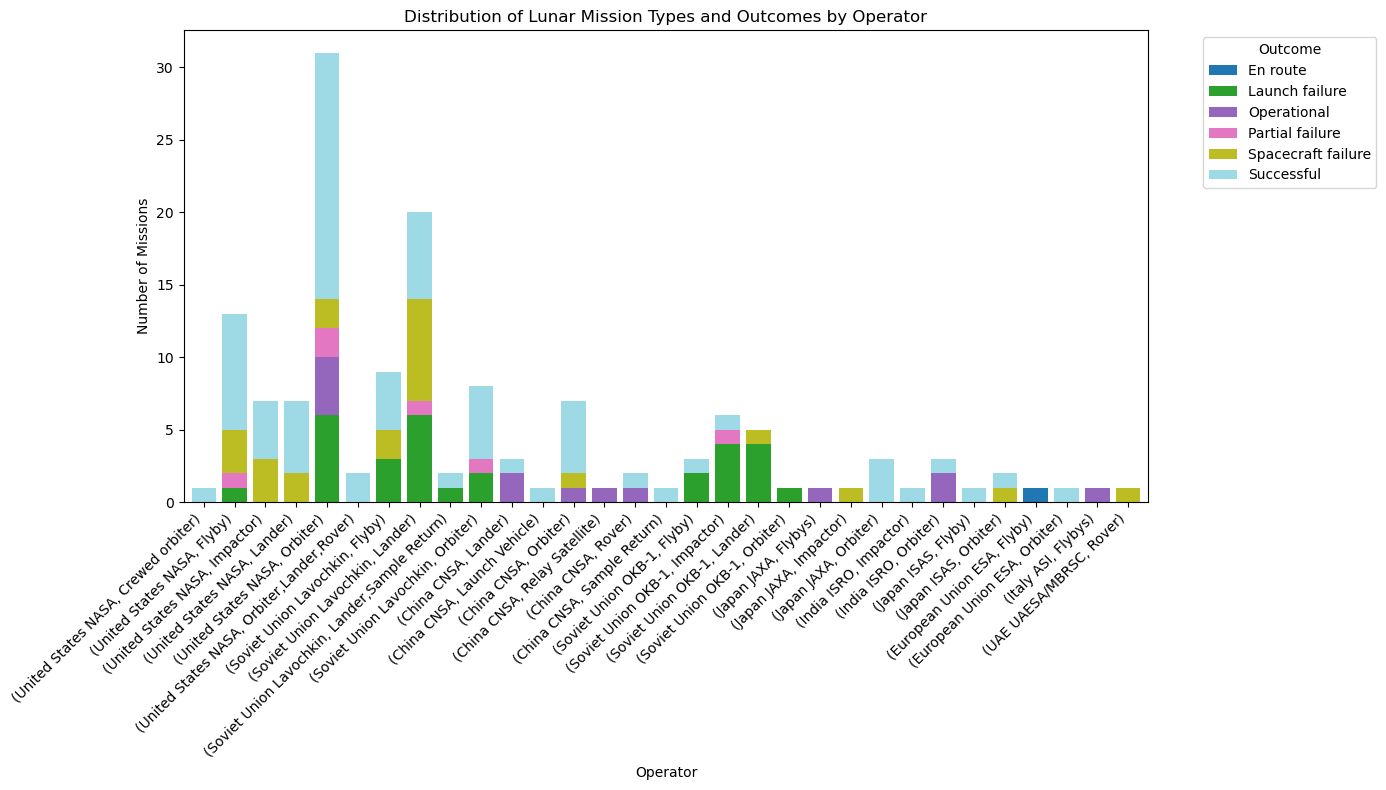

In [13]:
# Count the number of missions by mission type, outcome, and operator
missions_by_type_outcome_operator = df.groupby(['Operator', 'Mission Type', 'Outcome']).size().unstack()

# Select the top 10 operators with the most missions
missions_by_type_outcome_operator_top = missions_by_type_outcome_operator.loc[top_operators]

# Plot the distribution of mission types and outcomes by operator
missions_by_type_outcome_operator_top.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20', width=0.8)
plt.title('Distribution of Lunar Mission Types and Outcomes by Operator')
plt.xlabel('Operator')
plt.ylabel('Number of Missions')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> The grouped bar chart shows the distribution of different mission types and outcomes for the top 10 operators. Each group of bars represents a different operator, each color represents a different mission outcome, and the height of each color segment represents the number of missions with that outcome for a given mission type and operator. As we can see, the distribution of mission outcomes varies widely by operator and mission type. For example, the United States (NASA) has a high number of successful orbiter and lander missions, while the Soviet Union (OKB-1) has a high number of successful orbiter and impactor missions.

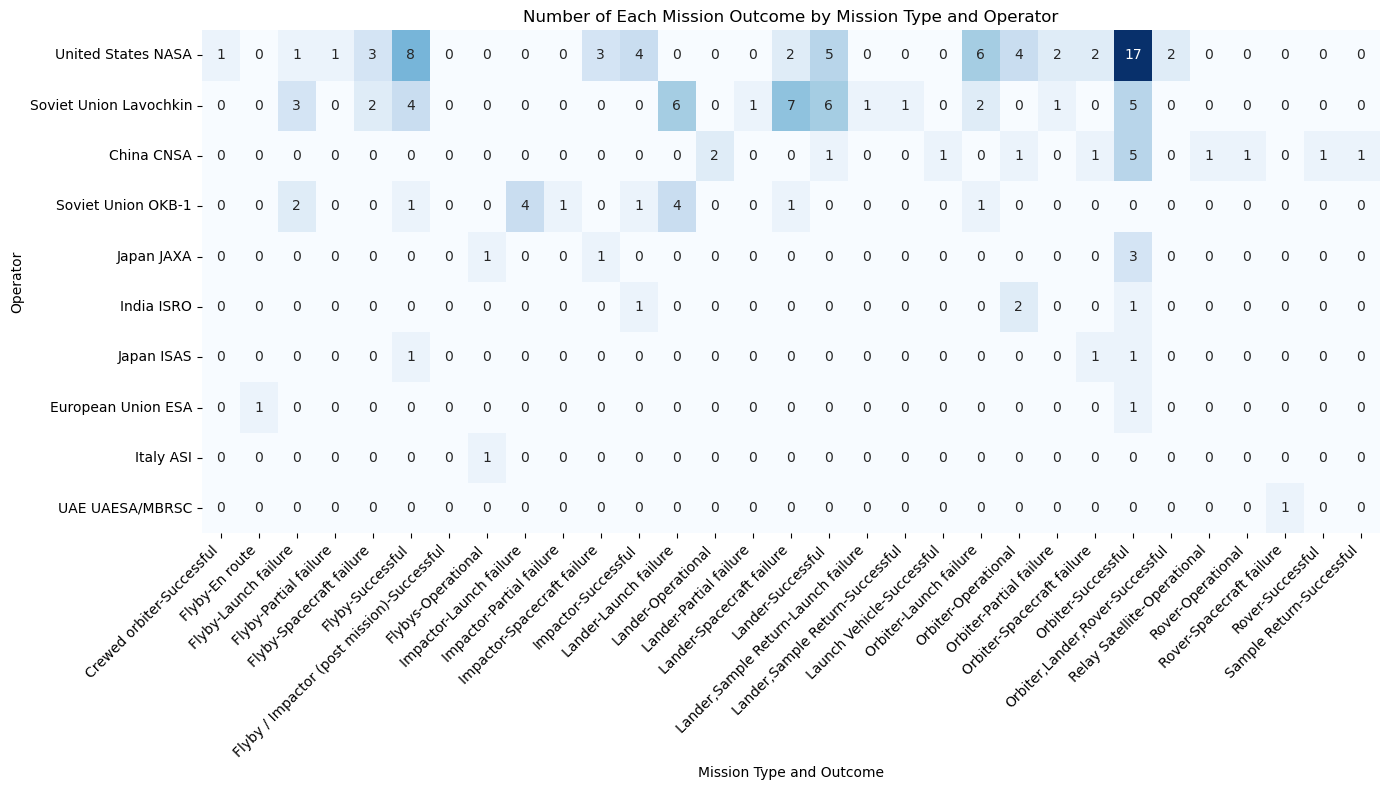

In [14]:
# Count the number of each mission outcome for each mission type and operator
outcome_by_type_operator = df.pivot_table(index='Operator', columns=['Mission Type', 'Outcome'], aggfunc='size', fill_value=0)

# Select the top 10 operators with the most missions
outcome_by_type_operator_top = outcome_by_type_operator.loc[top_operators]

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(outcome_by_type_operator_top, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Number of Each Mission Outcome by Mission Type and Operator')
plt.xlabel('Mission Type and Outcome')
plt.ylabel('Operator')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> The heatmap shows the number of each mission outcome (e.g., success, failure) for each mission type (e.g., orbiter, lander, rover) and operator. Each cell in the heatmap represents the number of missions with a specific outcome, mission type, and operator. As we can see, the distribution of mission outcomes varies widely by operator and mission type. For example, the United States (NASA) has a high number of successful orbiter and lander missions, while the Soviet Union (OKB-1) has a high number of successful orbiter and impactor missions.

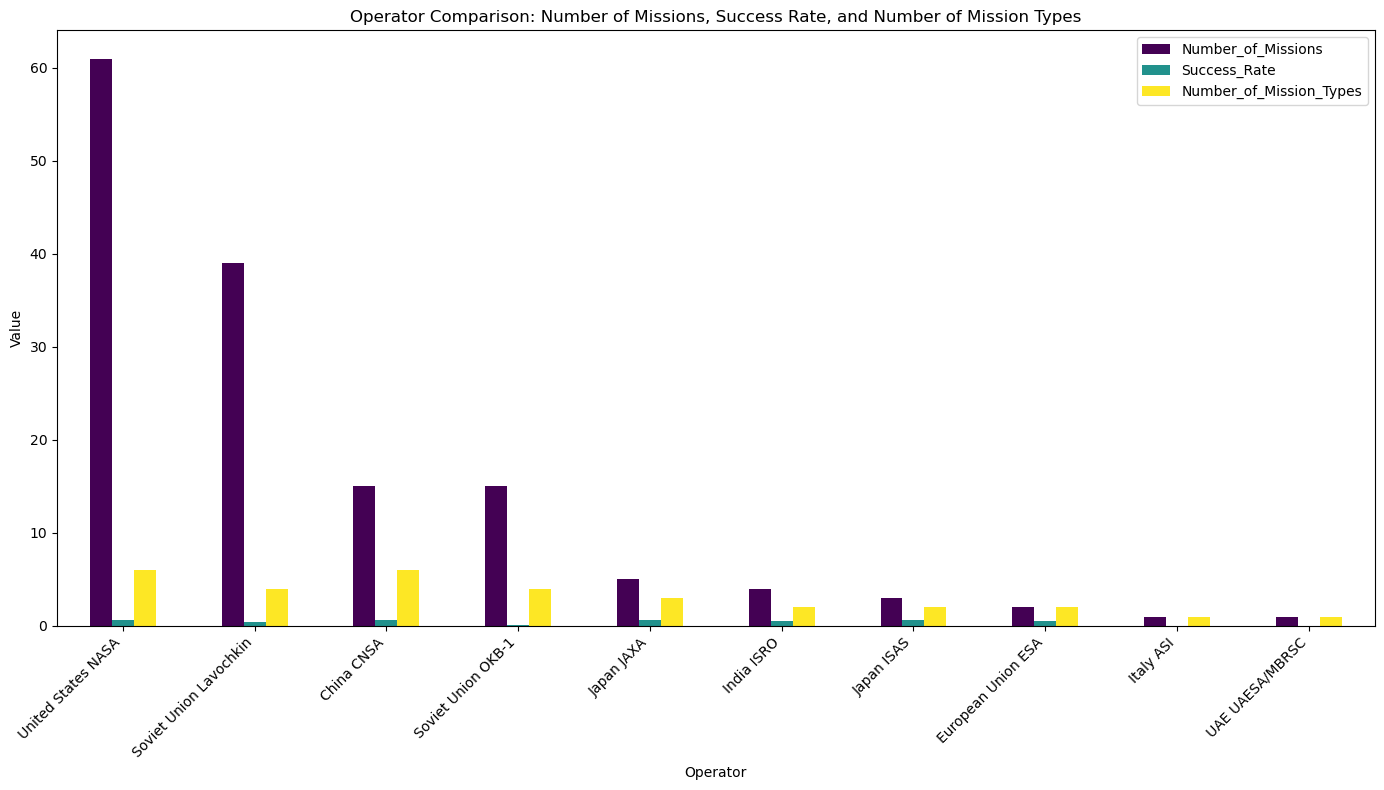

In [15]:
# Count the number of missions, success rate, and number of different mission types for each operator
operator_comparison = df.groupby('Operator').agg(
    Number_of_Missions=('Mission', 'count'),
    Success_Rate=('Success', 'mean'),
    Number_of_Mission_Types=('Mission Type', 'nunique')
)

# Select the top 10 operators with the most missions
operator_comparison_top = operator_comparison.loc[top_operators]

# Plot the bar chart
operator_comparison_top.plot(kind='bar', figsize=(14, 8), cmap='viridis')
plt.title('Operator Comparison: Number of Missions, Success Rate, and Number of Mission Types')
plt.xlabel('Operator')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> The bar chart shows the number of missions, success rate, and number of different mission types for each of the top 10 operators. As we can see, the number of missions, success rate, and number of different mission types vary widely by operator. For example, the United States (NASA) has conducted the most missions, has a high success rate, and has conducted a wide variety of mission types, while other operators, such as the Soviet Union (OKB-1), have conducted fewer missions, have a lower success rate, and have conducted a narrower variety of mission types.

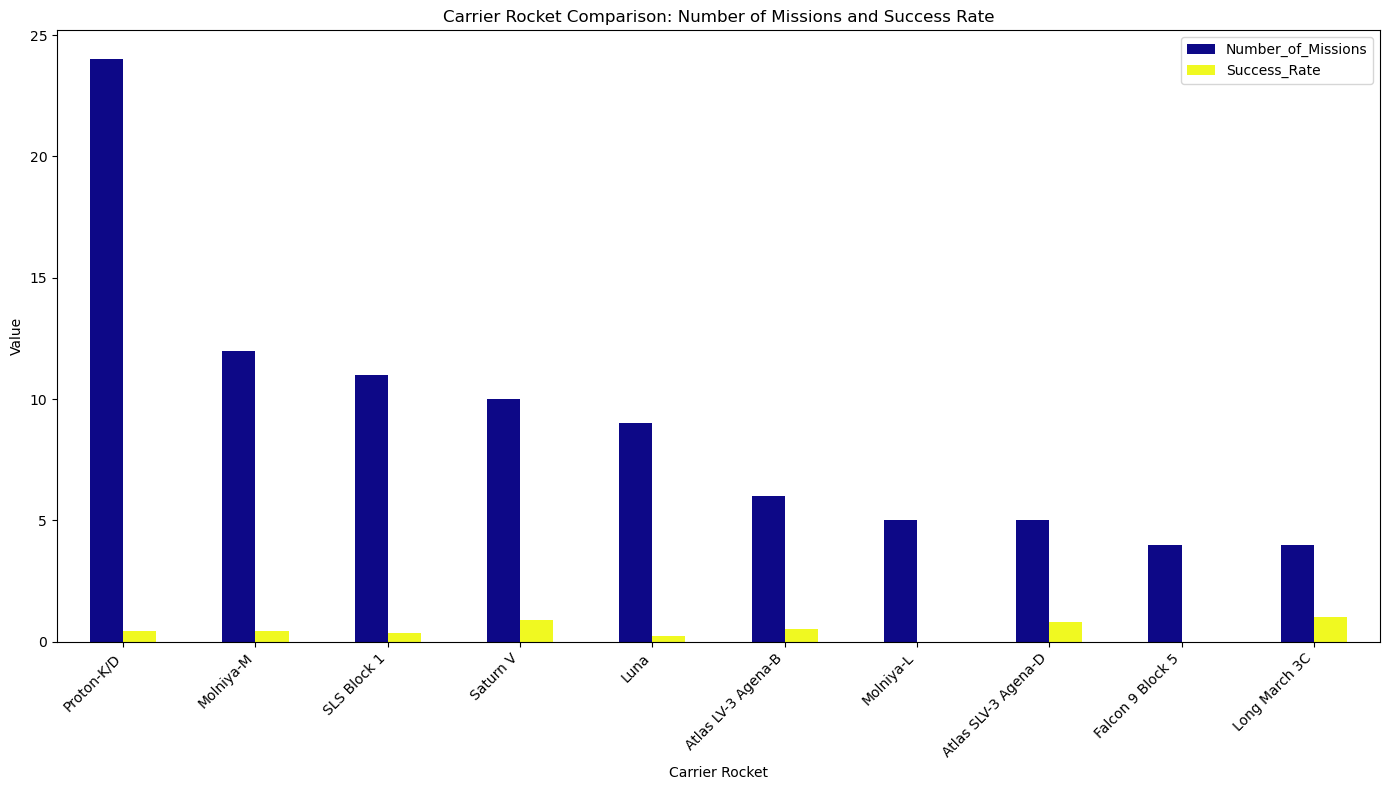

In [16]:
# Count the number of missions and success rate for each carrier rocket
rocket_comparison = df.groupby('Carrier Rocket').agg(
    Number_of_Missions=('Mission', 'count'),
    Success_Rate=('Success', 'mean')
)

# Select the top 10 rockets with the most missions
rocket_comparison_top = rocket_comparison.loc[top_rockets]

# Plot the bar chart
rocket_comparison_top.plot(kind='bar', figsize=(14, 8), cmap='plasma')
plt.title('Carrier Rocket Comparison: Number of Missions and Success Rate')
plt.xlabel('Carrier Rocket')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> The bar chart shows the number of missions and success rate for each of the top 10 carrier rockets. As we can see, the number of missions and success rate vary widely by carrier rocket. For example, the "Atlas SLV-3 Agena-D" has conducted the most missions but has a relatively low success rate, while other carrier rockets, such as the "Saturn IB", have conducted fewer missions but have a higher success rate.

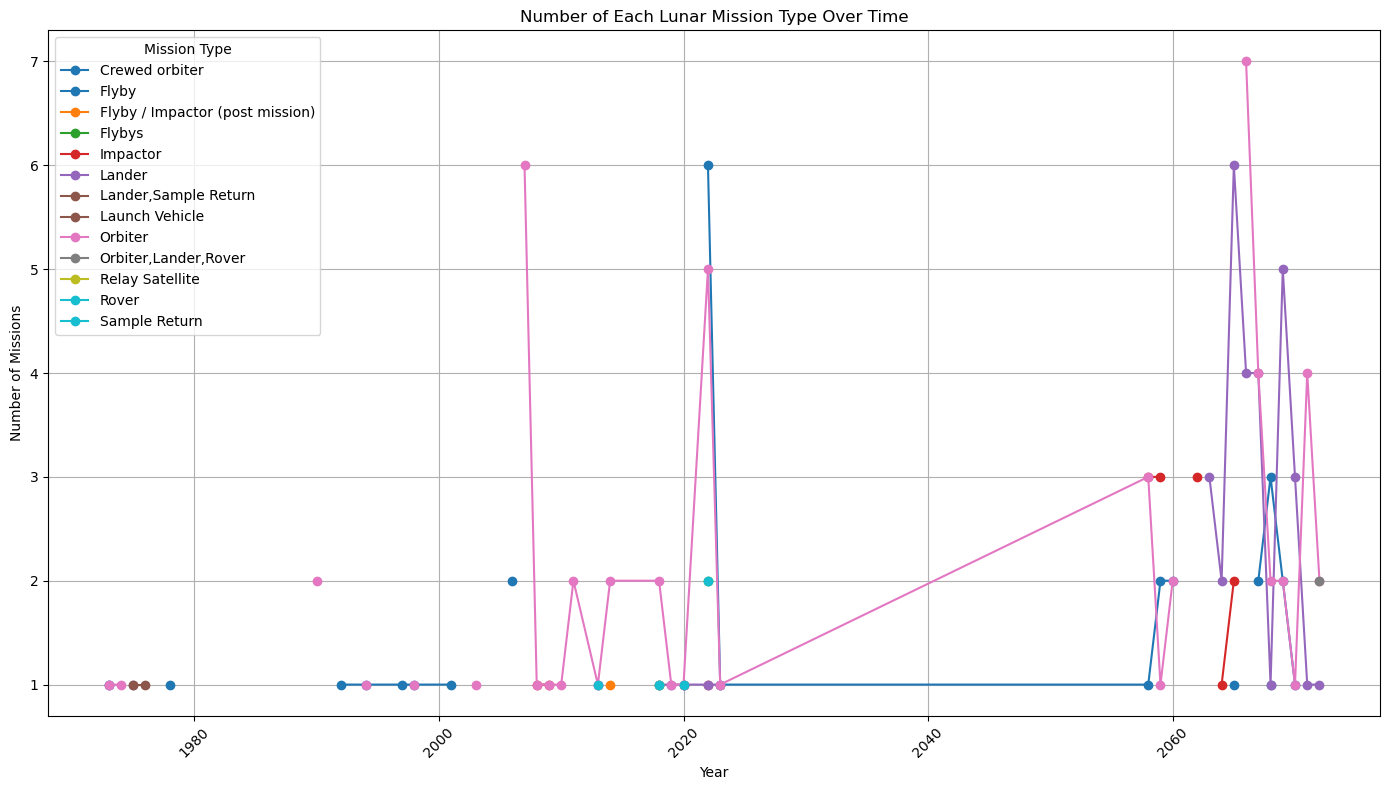

In [17]:
# Count the number of each mission type over time
missions_by_type_year = df.groupby(['Year', 'Mission Type']).size().unstack()

# Plot the number of each mission type over time
missions_by_type_year.plot(kind='line', marker='o', figsize=(14, 8), cmap='tab10')
plt.title('Number of Each Lunar Mission Type Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.legend(title='Mission Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


> The line chart shows the number of each lunar mission type over time. Each line represents a different mission type, and the height of each point on the line represents the number of missions of that type launched in a given year. As we can see, the most common mission types in the early years of lunar exploration were orbiters and impactors. In recent years, there has been an increase in the number of lander and rover missions, reflecting advancements in technology and a shift in focus towards surface exploration.